In [2]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt

# Read in the edgelist file from csv
file_network = pd.read_csv("london_flows.csv")
index_flows_zero=file_network[file_network.flows==0].index
file_network_new=file_network.drop(index_flows_zero)

# Print data (first five rows)
file_network_new.head()

,station_origin,station_destination,flows,population,jobs,distance
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
5,Abbey Road,Crossharbour,1,599,1208,6686.475560


Part 1: London’s underground resilience
II. Flows: Weighted Network

In [3]:
import networkx as nx
# Create graph object
g_station = nx.from_pandas_edgelist(file_network_new, 'station_origin', 'station_destination','flows')
v_weights={(e1, e2):round(1./weight,7) for e1, e2, weight in g_station.edges(data='flows')}
nx.set_edge_attributes(g_station, v_weights, 'v_weights')

1. Centrality Measures
(1) Degree centrality

In [4]:
#Compute the centrality
centrality=dict(g_station.degree(weight='flows'))
# Print the top 10 nodes
sorted_nodes_degree = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(sorted_nodes_degree, columns=['nodes', 'centrality'])
top_10 = df.head(10)
print(top_10)

                      nodes  centrality
0         Bank and Monument       76981
1                  Waterloo       67125
2                 Stratford       59578
3              Canary Wharf       53018
4          Liverpool Street       50361
5                  Victoria       36938
6             London Bridge       33827
7  King's Cross St. Pancras       31693
8             Oxford Circus       24112
9                Paddington       23263


(2) Closeness centrality

In [5]:
#Compute the centrality
centrality=nx.closeness_centrality(g_station,distance='v_weights')
# Print the top 10 nodes
sorted_nodes_closeness= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(sorted_nodes_closeness, columns=['nodes', 'centrality'])
top_10 = df.head(10)
print(top_10)

                      nodes  centrality
0                  Waterloo  149.251767
1              Canary Wharf  148.953875
2         Bank and Monument  148.760204
3                 Stratford  147.981808
4          Liverpool Street  146.945702
5             London Bridge  145.544617
6             Oxford Circus  143.964358
7                Farringdon  143.274247
8  King's Cross St. Pancras  141.512978
9                  Victoria  141.438810


(3) Betweenness centrality

In [5]:
#Compute the centrality
centrality=nx.betweenness_centrality(g_station,weight='v_weights')
# Print the top 10 nodes
sorted_nodes_betweenness = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(sorted_nodes_betweenness, columns=['nodes', 'centrality'])
top_10 = df.head(10)
print(top_10)

               nodes  centrality
0           Waterloo    0.480383
1  Bank and Monument    0.420629
2          Stratford    0.411635
3       Canary Wharf    0.407068
4   Liverpool Street    0.277892
5      Oxford Circus    0.161553
6         Farringdon    0.137089
7        Hammersmith    0.118935
8           Victoria    0.108414
9       Canada Water    0.086914


2. Impact Measures
(1) Average shortest path length

In [43]:
impact= nx.average_shortest_path_length(g_station,weight='v_weights')
print(impact)

0.012980423654797998


(2) Density

In [8]:
weighted_degree= nx.degree(g_station,weight='flows')
degrees=[e[1] for e in weighted_degree]
impact=np.sum(degrees)
print(impact)

1680518


3. Node Removal

(1) Degree centrality
i. Average shortest path length

Bank and Monument
Waterloo
Stratford
Bank and Monument
Stratford
Waterloo


Text(0, 0.5, 'Average shortest path length')

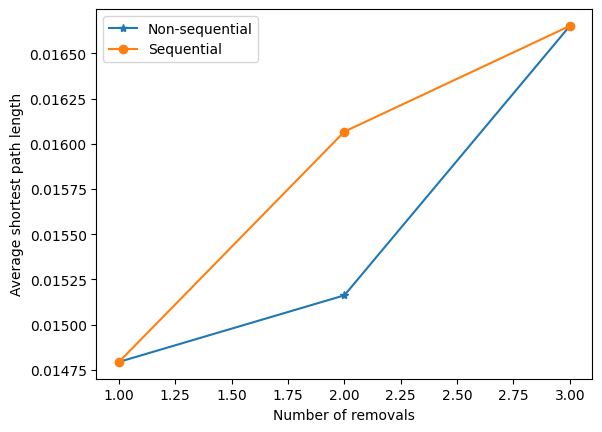

In [6]:
# non-sequential removal
num=3
g_station_non_seq=copy.deepcopy(g_station)
centrality=dict(g_station_non_seq.degree(weight='flows'))
sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
impact_non_seq=np.zeros(num)
for i in range(num):
    print(sorted_nodes[i][0])
    g_station_non_seq.remove_node(sorted_nodes[i][0])
    impact_non_seq[i]= nx.average_shortest_path_length(g_station_non_seq,weight='v_weights')
# sequential removal
g_station_seq=copy.deepcopy(g_station)
impact_seq=np.zeros(num)
for i in range(num):
    centrality=dict(g_station_seq.degree(weight='flows'))
    sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    print(sorted_nodes[0][0])
    g_station_seq.remove_node(sorted_nodes[0][0])
    if nx.is_connected(g_station_seq):
        impact_seq[i]= nx.average_shortest_path_length(g_station_seq,weight='v_weights')       
    else:
        impact_seq[i]=np.inf
x=np.array(range(1,num+1))
plt.figure()
plt.plot(x,impact_non_seq,'-*',x,impact_seq,'-o')
plt.legend(['Non-sequential','Sequential'])
plt.xlabel('Number of removals')
plt.ylabel('Average shortest path length')




ii. Density

Bank and Monument
Waterloo
Stratford
Bank and Monument
Stratford
Waterloo


Text(0, 0.5, 'Density')

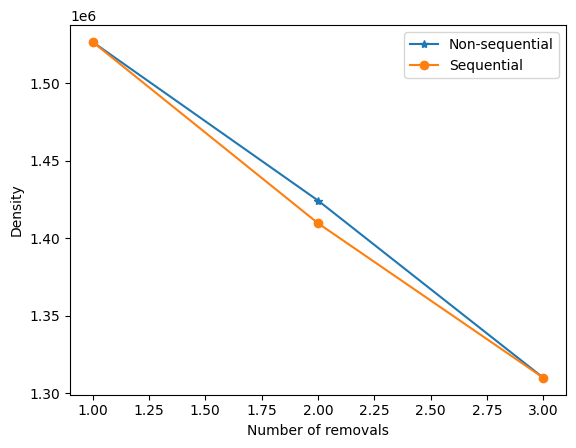

In [7]:
# non-sequential removal
num=3
g_station_non_seq=copy.deepcopy(g_station)
centrality=dict(g_station_non_seq.degree(weight='flows'))
sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
impact_non_seq=np.zeros(num)
for i in range(num):
    print(sorted_nodes[i][0])
    g_station_non_seq.remove_node(sorted_nodes[i][0]) 
    weighted_degree= nx.degree(g_station_non_seq,weight='flows')
    degrees=[e[1] for e in weighted_degree]
    impact_non_seq[i]=np.sum(degrees)
# sequential removal
g_station_seq=copy.deepcopy(g_station)
impact_seq=np.zeros(num)
for i in range(num): 
    centrality=dict(g_station_seq.degree(weight='flows'))
    sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    print(sorted_nodes[0][0])
    g_station_seq.remove_node(sorted_nodes[0][0]) 
    weighted_degree= nx.degree(g_station_seq,weight='flows')
    degrees=[e[1] for e in weighted_degree]
    impact_seq[i]=np.sum(degrees)
x=np.array(range(1,num+1))
plt.figure()
plt.plot(x,impact_non_seq,'-*',x,impact_seq,'-o')
plt.legend(['Non-sequential','Sequential'])
plt.xlabel('Number of removals')
plt.ylabel('Density')

(2) Closeness centrality
i.  Average shortest path length

Text(0, 0.5, 'Average shortest path length')

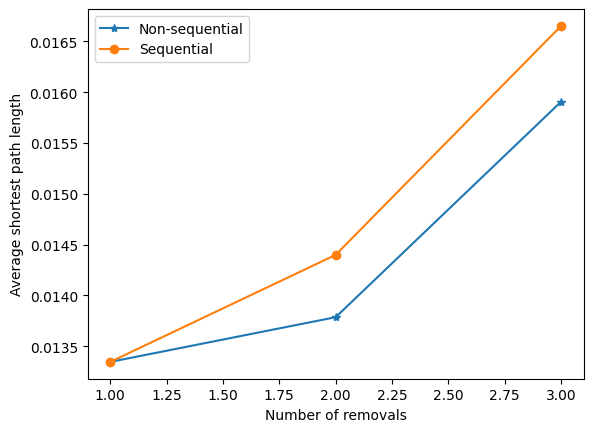

In [11]:
# non-sequential removal
num=3
g_station_non_seq=copy.deepcopy(g_station)
centrality=nx.closeness_centrality(g_station_non_seq,distance='v_weights')
sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
impact_non_seq=np.zeros(num)
for i in range(num):
    print(sorted_nodes[i][0])
    g_station_non_seq.remove_node(sorted_nodes[i][0])
    impact_non_seq[i]= nx.average_shortest_path_length(g_station_non_seq,weight='v_weights')   
# sequential removal
g_station_seq=copy.deepcopy(g_station)
impact_seq=np.zeros(num)
for i in range(num):
    centrality=nx.closeness_centrality(g_station_seq,distance='v_weights')
    sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    print(sorted_nodes[0][0])
    g_station_seq.remove_node(sorted_nodes[0][0])
    if nx.is_connected(g_station_seq):
        impact_seq[i]= nx.average_shortest_path_length(g_station_seq,weight='v_weights')       
    else:
        impact_seq[i]=np.inf
x=np.array(range(1,num+1))
plt.figure()
plt.plot(x,impact_non_seq,'-*',x,impact_seq,'-o')
plt.legend(['Non-sequential','Sequential'])
plt.xlabel('Number of removals')
plt.ylabel('Average shortest path length')

ii. Density

Text(0, 0.5, 'Density')

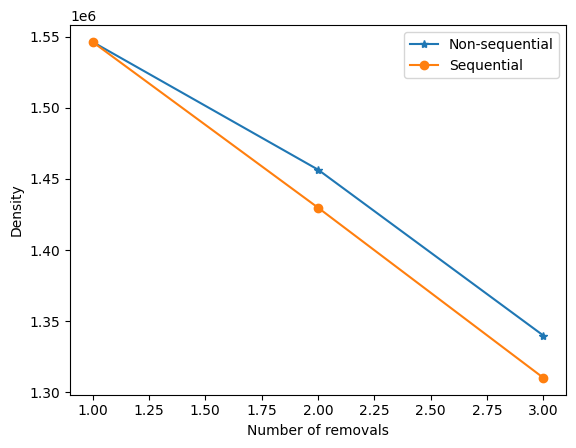

In [12]:
# non-sequential removal
num=3
g_station_non_seq=copy.deepcopy(g_station)
centrality=nx.closeness_centrality(g_station_non_seq,distance='v_weights')
sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
impact_non_seq=np.zeros(num)
for i in range(num):
    g_station_non_seq.remove_node(sorted_nodes[i][0])
    weighted_degree= nx.degree(g_station_non_seq,weight='flows')
    degrees=[e[1] for e in weighted_degree]
    impact_non_seq[i]=np.sum(degrees)
# sequential removal
g_station_seq=copy.deepcopy(g_station)
impact_seq=np.zeros(num)
for i in range(num):
    centrality=nx.closeness_centrality(g_station_seq,distance='v_weights')
    sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    g_station_seq.remove_node(sorted_nodes[0][0])
    weighted_degree= nx.degree(g_station_seq,weight='flows')
    degrees=[e[1] for e in weighted_degree]
    impact_seq[i]=np.sum(degrees)
x=np.array(range(1,num+1))
plt.figure()
plt.plot(x,impact_non_seq,'-*',x,impact_seq,'-o')
plt.legend(['Non-sequential','Sequential'])
plt.xlabel('Number of removals')
plt.ylabel('Density')


(3) Betweenness centrality
i.  Average shortest path length

Text(0, 0.5, 'Average shortest path length')

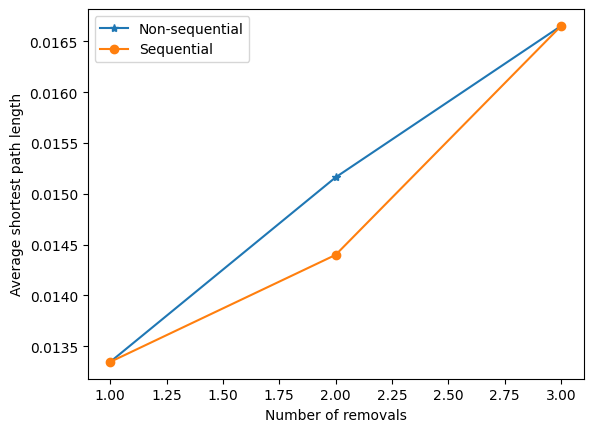

In [13]:
# non-sequential removal
num=3
g_station_non_seq=copy.deepcopy(g_station)
centrality=nx.betweenness_centrality(g_station_non_seq,weight='v_weights')
sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
impact_non_seq=np.zeros(num)
for i in range(num):
    g_station_non_seq.remove_node(sorted_nodes[i][0]) 
    impact_non_seq[i]= nx.average_shortest_path_length(g_station_non_seq,weight='v_weights')
# sequential removal
g_station_seq=copy.deepcopy(g_station)
impact_seq=np.zeros(num)
for i in range(num):
    centrality=nx.betweenness_centrality(g_station_seq,weight='v_weights')
    sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    g_station_seq.remove_node(sorted_nodes[0][0])
    if nx.is_connected(g_station_seq):
        impact_seq[i]= nx.average_shortest_path_length(g_station_seq,weight='v_weights')       
    else:
        impact_seq[i]=np.inf
x=np.array(range(1,num+1))
plt.figure()
plt.plot(x,impact_non_seq,'-*',x,impact_seq,'-o')
plt.legend(['Non-sequential','Sequential'])
plt.xlabel('Number of removals')
plt.ylabel('Average shortest path length')

ii. Density

Text(0, 0.5, 'Density')

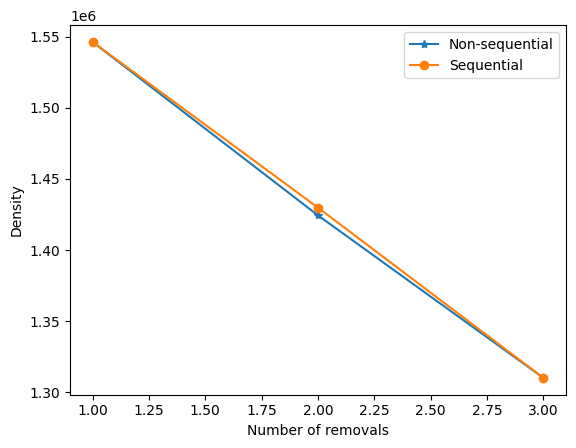

In [14]:
# non-sequential removal
num=3
g_station_non_seq=copy.deepcopy(g_station)
centrality=nx.betweenness_centrality(g_station_non_seq,weight='v_weights')
sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
impact_non_seq=np.zeros(num)
for i in range(num):
    g_station_non_seq.remove_node(sorted_nodes[i][0])
    weighted_degree= nx.degree(g_station_non_seq,weight='flows')
    degrees=[e[1] for e in weighted_degree]
    impact_non_seq[i]=np.sum(degrees)
# sequential removal
g_station_seq=copy.deepcopy(g_station)
impact_seq=np.zeros(num)
for i in range(num):
    centrality=nx.betweenness_centrality(g_station_seq,weight='v_weights')
    sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    g_station_seq.remove_node(sorted_nodes[0][0])  
    weighted_degree= nx.degree(g_station_seq,weight='flows')
    degrees=[e[1] for e in weighted_degree]
    impact_seq[i]=np.sum(degrees)
x=np.array(range(1,num+1))
plt.figure()
plt.plot(x,impact_non_seq,'-*',x,impact_seq,'-o')
plt.legend(['Non-sequential','Sequential'])
plt.xlabel('Number of removals')
plt.ylabel('Density')